In [ ]:
from __future__ import print_function
import time
import numpy as np
import seaborn as sns
from numpy import reshape
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

mnist = fetch_openml ('mnist_784')

In [ ]:
X = mnist.data / 255.0
y = mnist.target
print(X.shape, y.shape)

(70000, 784) (70000,)


In [ ]:
feat_cols = ['pixel'+ str(i) for i in range(X.shape[1])]
df = pd.DataFrame(X, columns = feat_cols)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i))
X, y = None , None
print('Size of the dataframe: {} '.format(df.shape))

np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

Size of the dataframe: (70000, 786) 


In [ ]:
df[feat_cols].values

array([[nan,  0.,  0., ...,  0.,  0.,  0.],
       [nan,  0.,  0., ...,  0.,  0.,  0.],
       [nan,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [nan,  0.,  0., ...,  0.,  0.,  0.],
       [nan,  0.,  0., ...,  0.,  0.,  0.],
       [nan,  0.,  0., ...,  0.,  0.,  0.]])

In [ ]:
df['pixel0'] = '0'

<Figure size 432x288 with 0 Axes>

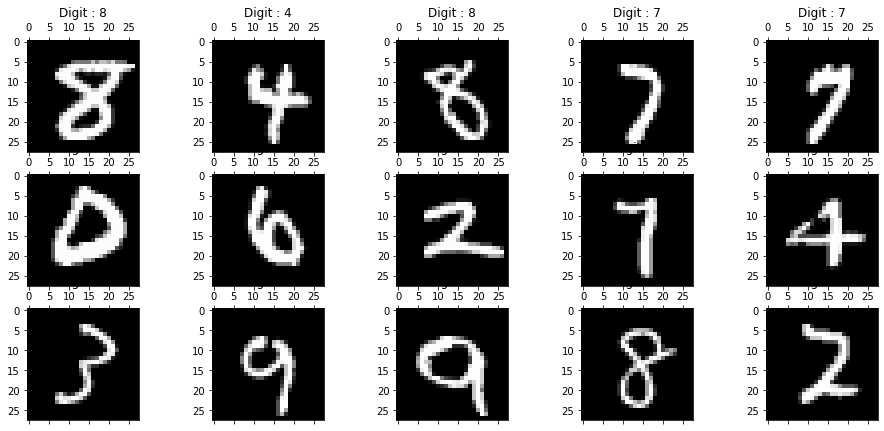

In [ ]:
plt.gray()
fig = plt.figure(figsize = (16 ,7))
for i in range(0,15):
    ax = fig.add_subplot(3, 5, i + 1, title = "Digit : {}".format(str(df.loc[rndperm[i], 'label'])))
    ax.matshow(df.loc[rndperm[i], feat_cols].values.reshape((28 ,28)).astype(float))
plt.show()

In [ ]:
df = df.fillna('pixel0', 0.0)

In [ ]:
df['0'].values

KeyError: ignored

In [ ]:
pca = PCA(n_components = 3)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca - one'] = pca_result[:, 0]
df['pca - two'] = pca_result[:, 1]
df['pca - three'] = pca_result[:, 2]
print('Explained variation per principal component : {} '.format(pca.explained_variance_ratio_))

Explained variation per principal component : [0.09746116 0.07155445 0.06149531] 


<AxesSubplot:xlabel='pca - one', ylabel='pca - two'>

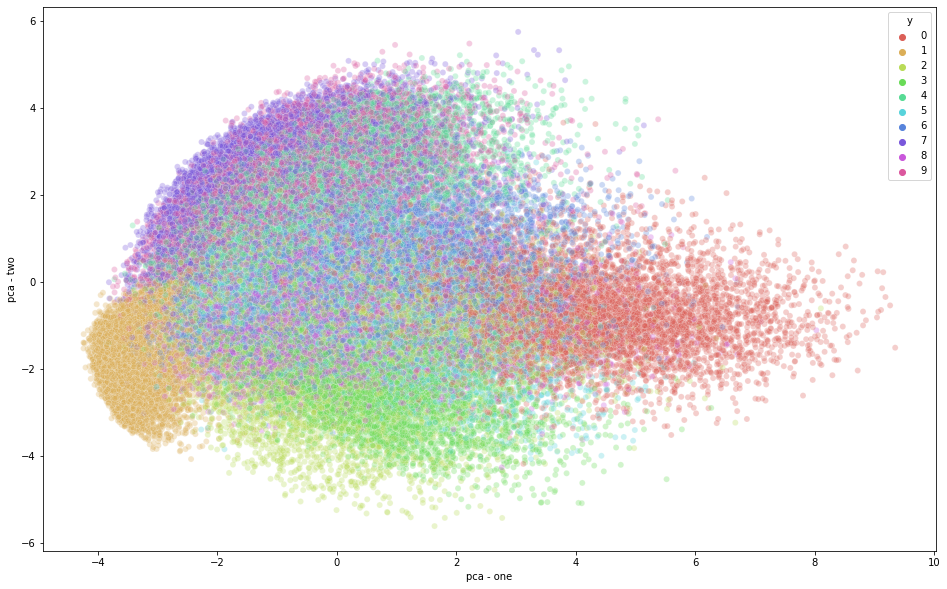

In [ ]:
plt.figure(figsize = (16, 10))
sns.scatterplot(x = "pca - one", y = "pca - two", hue = "y", legend ="full", 
  palette = sns.color_palette("hls", 10), data = df.loc[rndperm, :], alpha = 0.3)

<ipython-input-104-7f759d18aaa4>:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.figure(figsize =(16, 10)).gca(projection = '3d')


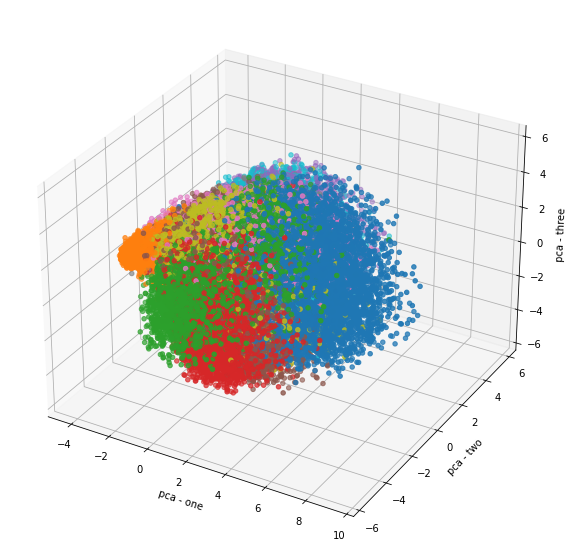

In [ ]:
ax = plt.figure(figsize =(16, 10)).gca(projection = '3d')
ax.scatter(xs = df.loc[rndperm, :]["pca - one"], ys = df.loc[rndperm, :]["pca - two"],
zs = df.loc[rndperm, :]["pca - three"] , c = df.loc[rndperm, :]["y"].astype(float), cmap = 'tab10')
ax.set_xlabel('pca - one')
ax.set_ylabel('pca - two')
ax.set_zlabel('pca - three')
plt.show()

In [ ]:
N = 10000
df_subset = df.loc[rndperm[:N], :].copy()
data_subset = df_subset[feat_cols].values

In [ ]:
pca = PCA(n_components = 3)
pca_result = pca.fit_transform(data_subset)
df_subset['pca - one'] = pca_result[:, 0]
df_subset['pca - two'] = pca_result[:, 1]
df_subset['pca - three'] = pca_result[:, 2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

time_start = time.time()
tsne = TSNE(n_components = 2, verbose = 1, perplexity = 40, n_iter = 300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time() - time_start))

In [ ]:
df_subset['tsne-2d - one'] = tsne_results[:, 0]
df_subset['tsne-2d - two'] = tsne_results[:, 1]
plt.figure(figsize = (16, 10))
sns.scatterplot(x = "tsne-2d - one", y = "tsne-2d - two", hue = "y",
palette = sns.color_palette("hls", 10), data = df_subset, legend = "full", alpha = 0.3)

In [ ]:
pplt.figure(figsize = (16, 7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(x = "pca - one", y = "pca - two", hue = "y", legend = "full", 
palette = sns.color_palette("hls", 10), data = df_subset, alpha = 0.3, ax = ax1)

ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(x = "tsne-2d - one", y = "tsne-2d - two", hue = "y", legend = "full",
palette = sns.color_palette("hls", 10), data = df_subset, alpha = 0.3, ax = ax2)